# INTRODUCTION

This capstone project is the final project in my Google Data Analytics Professional Certificate course. In this case study I will be analyzing a public dataset for a fictional company provided by the course. I will be using R programming language and Kaggle notebook for this analysis because of its easy statistical analysis tools, data visualizations and dynamic features.

**The following data analysis steps will be followed:**
* Ask
* Prepare
* Process
* Analyze
* Share
* Act

**The case study roadmap below will be followed on each step:**

* Code, when needed.
* Key tasks.
* Deliverables.

### Scenario
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

# ASK
**Three questions will guide the future marketing program:**
 1. How do annual members and casual riders use Cyclistic bikes differently?
 2. Why would casual riders buy Cyclistic annual memberships?
 3. How can Cyclistic use digital media to influence casual riders to become members?

**Lily Moreno** (the director of marketing and my manager) has assigned you the first question to answer: How do annual members and casual riders use Cyclistic bikes differently?

**Key tasks**
1. Identify the business task
* The main objective is to design marketing strategies aimed at converting casual riders to annual members by understanding how they differ.
2. Consider key stakeholders
* Director of Marketing (Lily Moreno), Marketing Analytics team, Executive team.

**Deliverable**
1. A clear statement of the business task
* To find the differences between the casual riders and annual members.

# PREPARE
* I will use Cyclistic’s historical trip data to analyze and identify trends. The data has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement). Datasets are available here [link](https://divvy-tripdata.s3.amazonaws.com/index.html).

**Key tasks**
1. Download data and store it appropriately.
> *Data has been downloaded and copies have been stored securely on my computer and here on Kaggle.*
2. Identify how it’s organized.
> *The data is in CSV (comma-separated values) format, and there are a total of 13 columns.*
3. Sort and filter the data.
> *For this analysis, I will be using data for the last 12 months (Jan 2021 - Dec 2021) because it's more current.*
4. Determine the credibility of the data.
> *For the purpose of this case study, the datasets are appropriate and will enable me to answer the business questions. But data-privacy issues will prohibit me from using rider's personally identifiable information and this will prevent me from determining if riders have purchased multiple single passes. All ride id's are unique.*

**Deliverable**
1.  A description of all data sources used
> *Main source of data provided by the [Cylistic company](https://divvy-tripdata.s3.amazonaws.com/index.html).*

In [1]:
### Install and load necessary packages

library(tidyverse)
library(lubridate)
library(ggplot2)
library(dplyr)
library(sf)
library(geosphere)
library(ggmap)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1; sf_use_s2() is TRUE

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution

In [2]:
### Import data to R

jan21 <- read_csv("/kaggle/input/divvytripdata/202101-divvy-tripdata.csv")
feb21 <- read_csv("/kaggle/input/divvytripdata/202102-divvy-tripdata.csv")
mar21 <- read_csv("/kaggle/input/divvytripdata/202103-divvy-tripdata.csv")
apr21 <- read_csv("/kaggle/input/divvytripdata/202104-divvy-tripdata.csv")
may21 <- read_csv("/kaggle/input/divvytripdata/202105-divvy-tripdata.csv")
jun21 <- read_csv("/kaggle/input/divvytripdata/202106-divvy-tripdata.csv")
jul21 <- read_csv("/kaggle/input/divvytripdata/202107-divvy-tripdata.csv")
aug21 <- read_csv("/kaggle/input/divvytripdata/202108-divvy-tripdata.csv")
sep21 <- read_csv("/kaggle/input/divvytripdata/202109-divvy-tripdata.csv")
oct21 <- read_csv("/kaggle/input/divvytripdata/202110-divvy-tripdata.csv")
nov21 <- read_csv("/kaggle/input/divvytripdata/202111-divvy-tripdata.csv")
dec21 <- read_csv("/kaggle/input/divvytripdata/202112-divvy-tripdata.csv")

Rows: 96834 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 49622 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 228496 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7):

In [3]:
# Merging all dataframes into one single dataframe

tripdata <- bind_rows(jan21, feb21, mar21, apr21, may21, jun21, jul21, aug21, sep21, oct21, nov21, dec21)

# PROCESS
Cleaning and preparing data for analysis

**Key tasks**
1. Check the data for errors.
2. Choose your tools.
3. Transform the data so you can work with it effectively.
4. Document the cleaning process.

**Deliverable**
1. Documentation of any cleaning or manipulation of data

Following code chunks will be used for this phase.

In [4]:
# First 6 rows of the data frame
head(tripdata) 

# How many rows are in the data frame
nrow(tripdata)

# List of column names
colnames(tripdata)

# Dimensions of the data frame
dim(tripdata)

# Statistical summary of data
summary(tripdata)

# List of columns and data types
str(tripdata)

# Last 6 rows of the data frame
tail(tripdata)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NA,NA,41.90034,-87.69674,41.89,-87.72,member
DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NA,NA,41.90033,-87.69671,41.90,-87.69,member
EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NA,NA,41.90031,-87.69664,41.90,-87.70,member
4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NA,NA,41.90040,-87.69666,41.92,-87.69,member
BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NA,NA,41.90033,-87.69670,41.90,-87.70,casual
5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,NA,NA,41.90041,-87.69676,41.94,-87.71,casual


[1] 5595063

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] 5595063      13

   ride_id          rideable_type        started_at                 
 Length:5595063     Length:5595063     Min.   :2021-01-01 00:02:05  
 Class :character   Class :character   1st Qu.:2021-06-06 23:52:40  
 Mode  :character   Mode  :character   Median :2021-08-01 01:52:11  
                                       Mean   :2021-07-29 07:41:02  
                                       3rd Qu.:2021-09-24 16:36:16  
                                       Max.   :2021-12-31 23:59:48  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-01-01 00:08:39   Length:5595063     Length:5595063    
 1st Qu.:2021-06-07 00:44:21   Class :character   Class :character  
 Median :2021-08-01 02:21:55   Mode  :character   Mode  :character  
 Mean   :2021-07-29 08:02:58                                        
 3rd Qu.:2021-09-24 16:54:05                                        
 Max.   :2022-01-03 17:32:18      

spc_tbl_ [5,595,063 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5595063] "E19E6F1B8D4C42ED" "DC88F20C2C55F27F" "EC45C94683FE3F27" "4FA453A75AE377DB" ...
 $ rideable_type     : chr [1:5595063] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:5595063], format: "2021-01-23 16:14:19" "2021-01-27 18:43:08" ...
 $ ended_at          : POSIXct[1:5595063], format: "2021-01-23 16:24:44" "2021-01-27 18:47:12" ...
 $ start_station_name: chr [1:5595063] "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:5595063] "17660" "17660" "17660" "17660" ...
 $ end_station_name  : chr [1:5595063] NA NA NA NA ...
 $ end_station_id    : chr [1:5595063] NA NA NA NA ...
 $ start_lat         : num [1:5595063] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:5595063] -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ end_lat           : nu

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
92BBAB97D1683D69,electric_bike,2021-12-24 15:42:09,2021-12-24 19:29:35,Canal St & Madison St,13341,NA,NA,41.88180,-87.63997,41.88000,-87.64000,casual
847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NA,NA,41.88229,-87.63975,41.89000,-87.61000,casual
CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.88212,-87.64005,41.88911,-87.63886,member
60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.88196,-87.63995,41.88025,-87.62960,member
C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NA,NA,41.86000,-87.72000,41.85000,-87.71000,member
37AC57E34B2E7E97,classic_bike,2021-12-13 08:45:32,2021-12-13 08:49:09,Michigan Ave & Jackson Blvd,TA1309000002,Dearborn St & Monroe St,TA1305000006,41.87785,-87.62408,41.88132,-87.62952,member


#### Adding columns for Date, Month, Year and Day of the Week into the data frame

In [5]:
tripdata$date <- as.Date(tripdata$started_at)
tripdata$month <- format(as.Date(tripdata$date), "%m")
tripdata$day <- format(as.Date(tripdata$date), "%d")
tripdata$year <- format(as.Date(tripdata$date), "%Y")
tripdata$day_of_week <- format(as.Date(tripdata$date), "%A")


#### Add a ride_length calculation to tripdata

In [6]:
tripdata$ride_length <- difftime(tripdata$ended_at, tripdata$started_at)

#### Convert ride_length from Factor to Numeric in order to run calculations

In [7]:
tripdata$ride_length <- as.numeric(as.character(tripdata$ride_length))
is.numeric(tripdata$ride_length)

[1] TRUE

#### Add ride_distance calculation to trip_data

In [8]:
tripdata$ride_distance <- distGeo(matrix(c(tripdata$start_lng, tripdata$start_lat), ncol=2), matrix (c(tripdata$end_lng, tripdata$end_lat), ncol=2))

In [9]:
# Distance in km

tripdata$ride_distance <- tripdata$ride_distance/1000

#### Remove "bad" or "inconsistent" data
The data frame includes a few hundred entries when bikes where taken out of docks
and checked for quality by Divvy where ride_length was negative or "zero"

In [10]:
tripdata_clean <- tripdata[!(tripdata$ride_length <= 0),]

In [11]:
# Print summary of the data frame
glimpse(tripdata_clean)

Rows: 5,594,410
Columns: 20
$ ride_id            <chr> "E19E6F1B8D4C42ED", "DC88F20C2C55F27F", "EC45C94683…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2021-01-23 16:14:19, 2021-01-27 18:43:08, 2021-01-…
$ ended_at           <dttm> 2021-01-23 16:24:44, 2021-01-27 18:47:12, 2021-01-…
$ start_station_name <chr> "California Ave & Cortez St", "California Ave & Cor…
$ start_station_id   <chr> "17660", "17660", "17660", "17660", "17660", "17660…
$ end_station_name   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, "Wood St & Augu…
$ end_station_id     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, "657", "13258",…
$ start_lat          <dbl> 41.90034, 41.90033, 41.90031, 41.90040, 41.90033, 4…
$ start_lng          <dbl> -87.69674, -87.69671, -87.69664, -87.69666, -87.696…
$ end_lat            <dbl> 41.89000, 41.90000, 41.90000, 41.92000, 41.90000, 4…
$ end_lng            <dbl> -87.72000, -87.69000, -87.70000, -87.69000, -87.700…
$ member_cas

# ANALYZE
All the required information are now in one place and ready for exploration.

**Key tasks**

1. Aggregate your data so it’s useful and accessible.
1. Organize and format your data.
1. Perform calculations.
1. Identify trends and relationships.

**Deliverable**

1. A summary of the analysis.

Following code chunks will be used for this phase.

In [12]:
# Check the structure of the data frame
str(tripdata_clean)

# Check the summarized details of the clean data frame
summary(tripdata_clean)

tibble [5,594,410 × 20] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5594410] "E19E6F1B8D4C42ED" "DC88F20C2C55F27F" "EC45C94683FE3F27" "4FA453A75AE377DB" ...
 $ rideable_type     : chr [1:5594410] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:5594410], format: "2021-01-23 16:14:19" "2021-01-27 18:43:08" ...
 $ ended_at          : POSIXct[1:5594410], format: "2021-01-23 16:24:44" "2021-01-27 18:47:12" ...
 $ start_station_name: chr [1:5594410] "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:5594410] "17660" "17660" "17660" "17660" ...
 $ end_station_name  : chr [1:5594410] NA NA NA NA ...
 $ end_station_id    : chr [1:5594410] NA NA NA NA ...
 $ start_lat         : num [1:5594410] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:5594410] -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ end_lat           : num [1:5594410] 

   ride_id          rideable_type        started_at                 
 Length:5594410     Length:5594410     Min.   :2021-01-01 00:02:05  
 Class :character   Class :character   1st Qu.:2021-06-06 23:48:04  
 Mode  :character   Mode  :character   Median :2021-08-01 01:47:45  
                                       Mean   :2021-07-29 07:38:35  
                                       3rd Qu.:2021-09-24 16:34:56  
                                       Max.   :2021-12-31 23:59:48  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-01-01 00:08:39   Length:5594410     Length:5594410    
 1st Qu.:2021-06-07 00:39:47   Class :character   Class :character  
 Median :2021-08-01 02:16:53   Mode  :character   Mode  :character  
 Mean   :2021-07-29 08:00:31                                        
 3rd Qu.:2021-09-24 16:52:38                                        
 Max.   :2022-01-03 17:32:18      

### Conduct descriptive analysis

Descriptive analysis on 'ride_length'

1. *Mean* = straight average (total ride length / total rides)

2. *Median* = midpoint of ride length

3. *Max* = longest ride

4. *Min* = shortest ride



In [13]:
tripdata_clean %>% 
group_by(member_casual) %>%
  summarise(average_ride_length = mean(ride_length), median_length = median(ride_length), 
            max_ride_length = max(ride_length), min_ride_length = min(ride_length))

member_casual,average_ride_length,median_length,max_ride_length,min_ride_length
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,1920.3468,959,3356649,1
member,818.0727,576,93596,1


#### Visualize "*members*" and "*casuals*" by the **total ride taken** (ride count)

In [14]:
tripdata_clean %>% 
    group_by(member_casual) %>% 
    summarise(ride_count = length(ride_id))

member_casual,ride_count
<chr>,<int>
casual,2528664
member,3065746


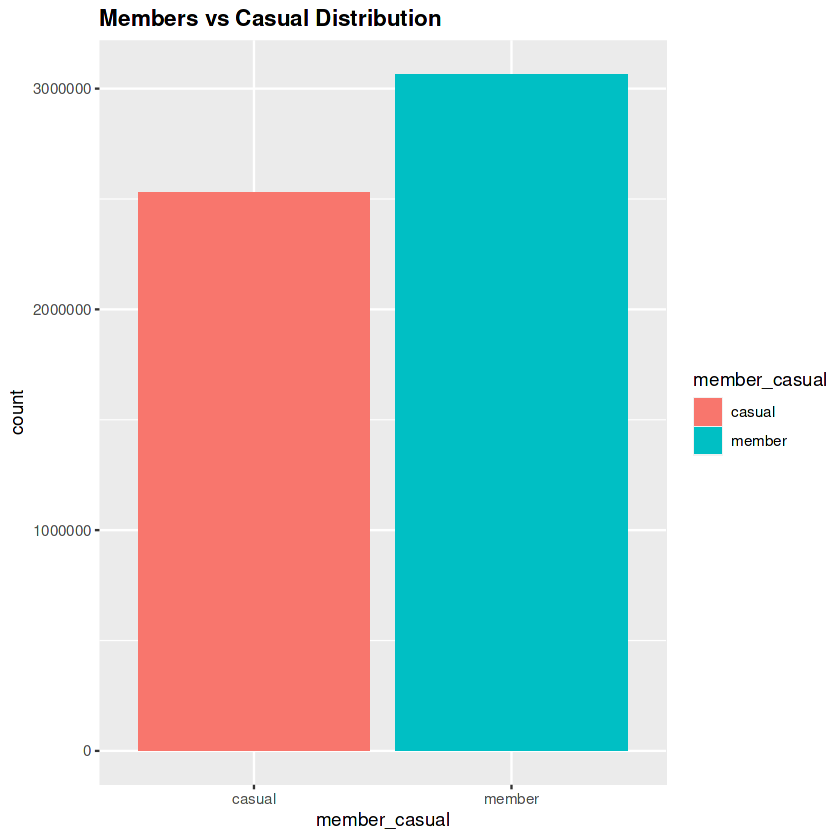

In [15]:
ggplot(data=tripdata_clean) + 
geom_bar(mapping=aes(x=member_casual, fill=member_casual)) +
ggtitle(bquote(bold("Members vs Casual Distribution"))) +
scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

> From the above graph, we can observe that there are more member riders compared to casual riders based on the ride count.

#### Total rides and average ride time by each day for "members vs casual riders"

In [16]:
# lets order the days of the week
tripdata_clean$day_of_week <- ordered(tripdata_clean$day_of_week, 
                                levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
tripdata_clean %>% 
  group_by(member_casual, day_of_week) %>%  #groups by member_casual
  summarise(number_of_rides = n(), #calculates the number of rides and average duration 
  average_ride_length = mean(ride_length),.groups="drop") %>% # calculates the average duration
  arrange(member_casual, day_of_week) #sort



member_casual,day_of_week,number_of_rides,average_ride_length
<chr>,<ord>,<int>,<dbl>
casual,Sunday,481048,2254.2573
casual,Monday,286340,1912.7473
casual,Tuesday,274357,1678.5293
casual,Wednesday,278910,1659.6644
casual,Thursday,286038,1662.3466
casual,Friday,364037,1821.1061
casual,Saturday,557934,2082.5980
member,Sunday,376086,939.5538
member,Monday,416181,794.8956


#### Visualize the above output table by "days of the week" and "number of rides taken" by "**member**" and "**casual**" riders.

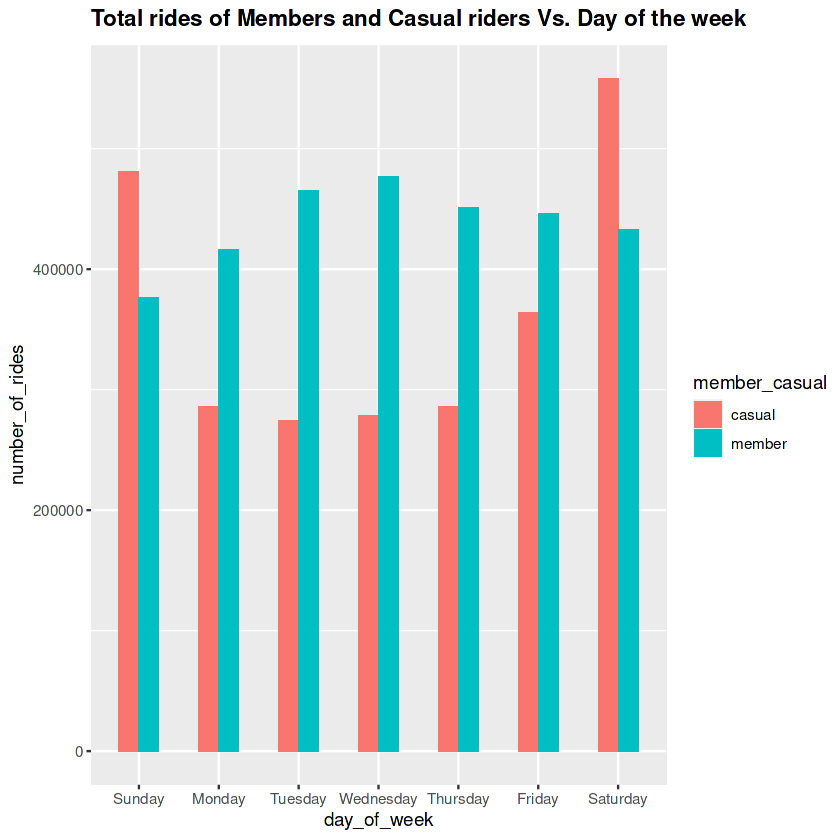

In [17]:
tripdata_clean %>%  
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n(), .groups="drop") %>% 
  arrange(member_casual, day_of_week)  %>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  ggtitle(bquote(bold("Total rides of Members and Casual riders Vs. Day of the week"))) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

> From the above graph, it is observed that casual riders have the highest number of rides on the weekend(saturday and sunday) compared to the other days while members are quite consistent and higher in the weekdays but they have the lowest number of rides on the weekend.

#### Visualize "average ride" by "day of the week"

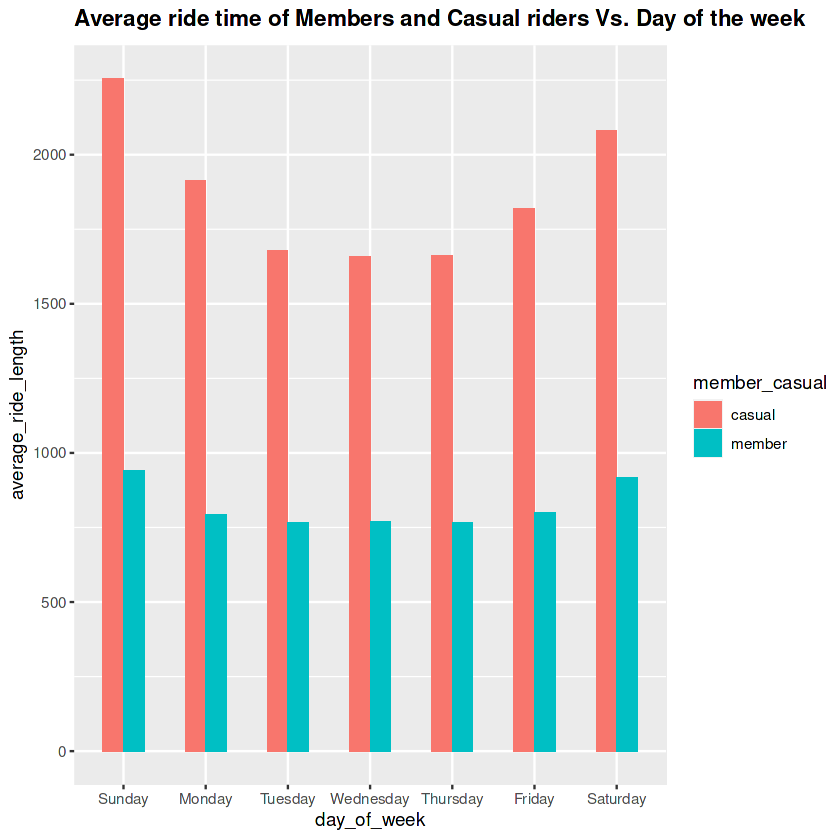

In [18]:
tripdata_clean %>%  
  group_by(member_casual, day_of_week) %>% 
  summarise(average_ride_length = mean(ride_length), .groups="drop") %>%
  ggplot(aes(x = day_of_week, y = average_ride_length, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) + 
  ggtitle(bquote(bold("Average ride time of Members and Casual riders Vs. Day of the week")))

> From the above graph, we can observe that "casual riders" ride for a longer time during the week, being the highest number of rides on weekends while members drive at a consistent pace during the week with the highest rides on the weekend.

#### Visualize the total rides taken by "Members" and "Casual" riders by month

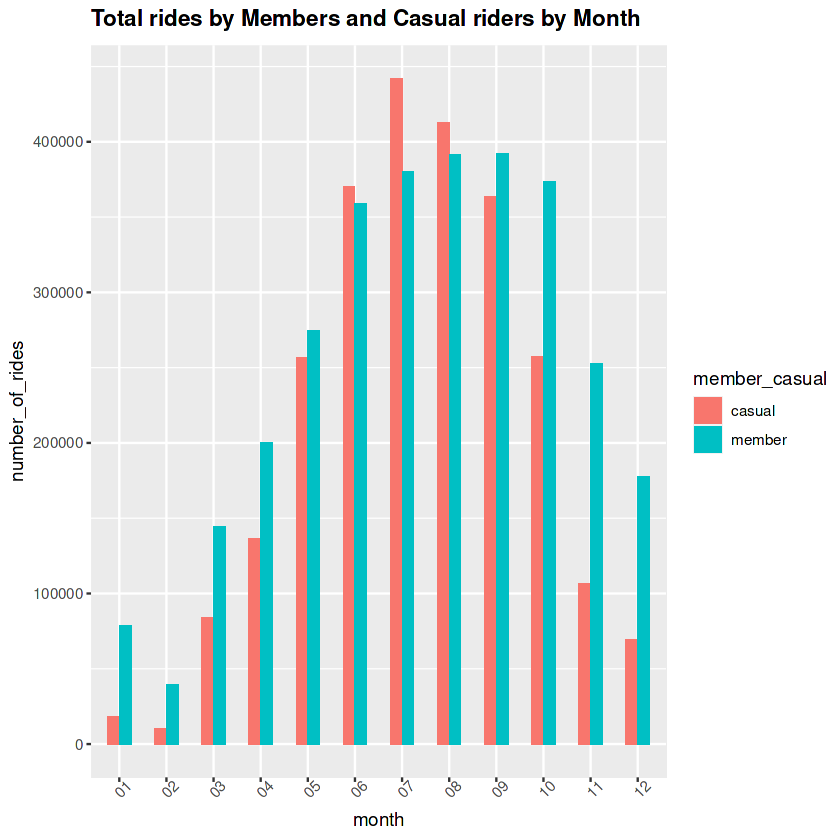

In [19]:
tripdata_clean %>%  
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n(),.groups="drop") %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  ggtitle(bquote(bold("Total rides by Members and Casual riders by Month"))) +
  theme(axis.text.x = element_text(angle = 45)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

> From the above graph, we observe that members had higher number of rides all through the year except in June, July and August where casual riders took more rides.

#### Compare Members and Casual riders depending on ride distance

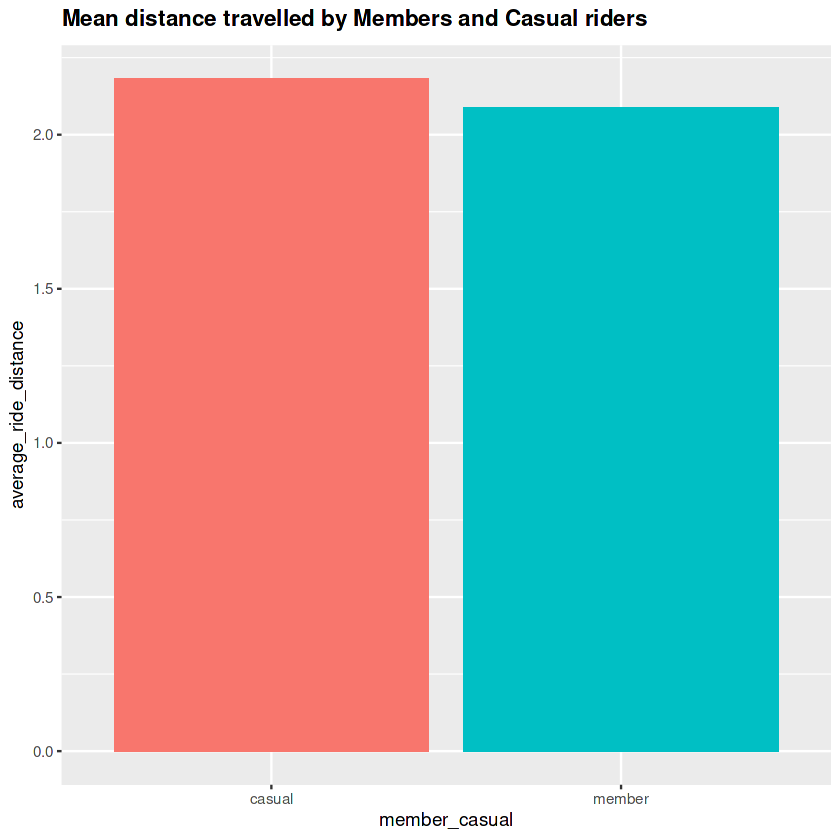

In [20]:
tripdata_clean %>% 
  group_by(member_casual) %>% drop_na() %>%
  summarise(average_ride_distance = mean(ride_distance)) %>%
  ggplot() + 
  geom_col(mapping= aes(x= member_casual,y= average_ride_distance,fill=member_casual), show.legend = FALSE) +
  ggtitle(bquote(bold("Mean distance travelled by Members and Casual riders")))

> From the above graph, we observe that Casual riders went a longer distance as compared to members by a few kilometers.

In [21]:
# Let's check the coordinates data of the rides.
# Adding a new data frame only for the most popular routes >200 rides
coordinates_df <- tripdata_clean %>% 
filter(start_lng != end_lng & start_lat != end_lat) %>%
group_by(start_lng, start_lat, end_lng, end_lat, member_casual, rideable_type) %>%
summarise(total_rides = n(),.groups="drop") %>%
filter(total_rides > 200)

# Let's create two different data frames depending on rider type (member_casual)

casual_riders <- coordinates_df %>% filter(member_casual == "casual")
member_riders <- coordinates_df %>% filter(member_casual == "member")


#### Visualizing chicago area using ggmap

In [22]:
chicago <- c(left = -87.700424, bottom = 41.790769, right = -87.554855, top = 41.990119)

chicago_map <- get_stamenmap(bbox = chicago, zoom = 12, maptype = "terrain")

ℹ Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.



Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Warning message:
“Removed 53 rows containing missing values (`geom_point()`).”


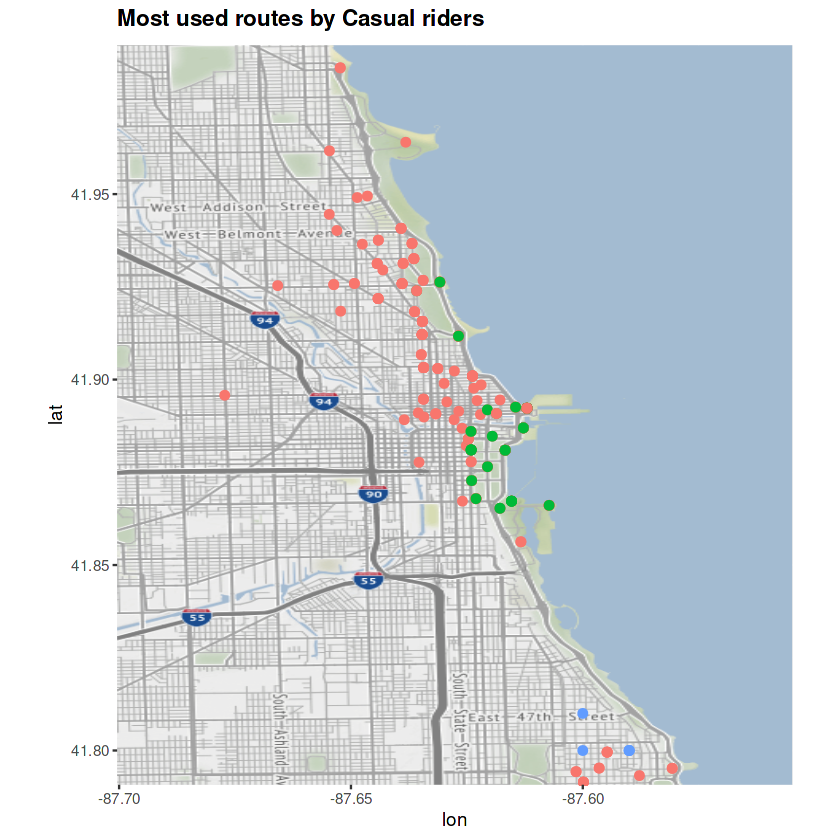

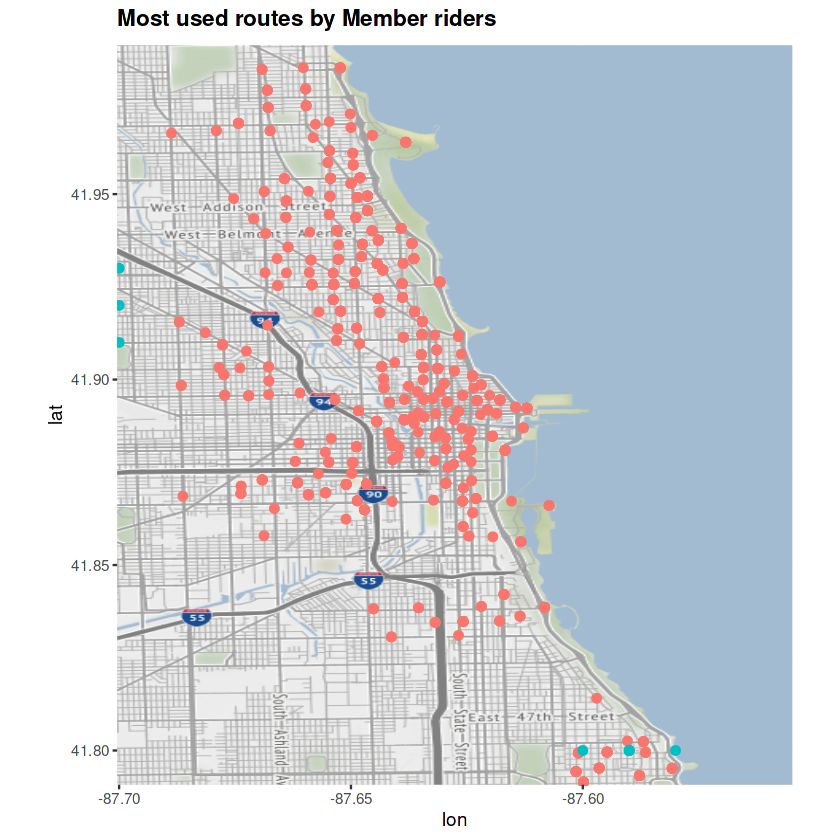

In [23]:
# maps on casual riders
ggmap(chicago_map,darken = c(0.1, "white")) +
   geom_point(casual_riders, mapping = aes(x = start_lng, y = start_lat, color=rideable_type), size = 2) +
   coord_fixed(0.8) +
   ggtitle(bquote(bold("Most used routes by Casual riders",x=NULL,y=NULL))) +
   theme(legend.position="none")

#map on member riders
ggmap(chicago_map,darken = c(0.1, "white")) +
    geom_point(member_riders, mapping = aes(x = start_lng, y = start_lat, color=rideable_type), size = 2) +  
    coord_fixed(0.8) +
    ggtitle(bquote(bold("Most used routes by Member riders",x=NULL,y=NULL))) +
    theme(legend.position="none")

> We can clearly see the casual rides are mostly located around the center of the town (or the bay area), with all their trips located around that area points towards their bike usage pattern, which is for leisure, probably tourist or sightseeing related rides.

> Members are mostly use bike all over the city including main city area and outside main center. This can be hypothesize as they travel for work purpose.
 

# SHARE
This phase will be done by presentation, but here on [Kaggle](https://www.kaggle.com/) we can use Notebooks to share our analysis and visualizations.

#### **Key tasks**
1. Determine the best way to share your findings.
2. Create effective data visualizations.
3. Present your findings.
4. Ensure your work is accessible.
 
#### **Deliverable**
 Supporting visualizations and key findings.
 
#### **Main insights and conclusions**
1. Members holds the biggest proportion of the total rides, ~10% bigger than casuals riders.
2. In all months we have more members than casual riders.
3. For casual riders the biggest volume of data is on the the weekend.
4. There is a bigger volume of bikers in the afternoon.

> *This could be possible that member use bikes for work purpose, this information can be backed by their bike usage in colder months, where there is significant drop in casual members in those months.*

#### **How members differs from casuals:**
1. Members have the bigger volume of data, except on saturday and sunday. On the weekend, casuals riders have the most data points.
2. Casuals riders have more ride length (ride duration) than members. Average ride time of member are mostly same slight increase in end of week.
3. We have more members during the morning, mainly between 7am and 10am. And more casuals between 3pm and 12am.
4. Members have a bigger preference for classic bikes, followed by electric bike. 
5. Members have a more fixed use for bikes for routine activities. Where as casual rider's usage is different, mostly all activiy in the weekend.
6. Casual member spend time near the center of the city or the bay area, where as member are scattered throughout the city.



# ACT
This phase will be done by the Cyclistic's executive team, Director of Marketing (**Lily Moreno**), Marketing Analytics team on the basis of my analysis. (Data-driven decision making)

#### Conclusion

1. Members have the bigger volume of data, except on saturday and sunday. On the weekend, casuals riders have the most data points.
2. Casuals riders have more ride length (ride duration) than members. Average ride time of member are mostly same slight increase in end of week.
3. We have more members during the morning, mainly between 7am and 10am. And more casuals between 3pm and 12am.
4. Members have a bigger preference for classic bikes, followed by electric bike.
5. Members have a more fixed use for bikes for routine activities. Where as casual rider's usage is different, mostly all activiy in the weekend.
6. Casual member spend time near the center of the city or the bay area, where as member are scattered throughout the city.

#### Deliverable
* Your top three recommendations based on your analysis.
1. Have a slash sale or promo for casual riders so they can acquire more bikes and indulge them in the benefits of being a member.
2. Coupons and discounts could be handed out along with the annual subscription / weekend-only membership for the usage of electric bikes targeting casual riders. Also increasing the number of electric bikes while reducing classic bikes. If electric bike costs more for the pass, this can be beneficial for the company. (As electric bike are already in trend and usage is good as per member and ride type data.
3. Host fun biking competitions with prizes at intervals for members on the weekends. Since there are lot of casual riders on weekends,this will also attract them to get a membership.

**Note** : ***All ride ids are unique so we cannot conclude if the same rider taken several rides. More rider data needed for further analysis.***

***Additonal data that could expand scope of analysis -***

1. Pricing details for members and casual riders - Based on this data, we might be to optimize cost structure for casual riders or provide discounts without affecting the profit margin.
2. Address/ neighborhood details of members to investigate if there are any location specific parameters that encourage membership.
3. Way to determine a recurring bike user using payment information or any personal identification.

**Resources**
* [RDocumentation](https://www.rdocumentation.org/)
* [RStudio](https://community.rstudio.com/) and [Kaggle](https://www.kaggle.com/discussion) community.

# *THANK YOU FOR READING THIS. OPEN TO YOUR VALUABLE FEEDBACKS.*